## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Setup Data

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Visualize Data

<AxesSubplot:>

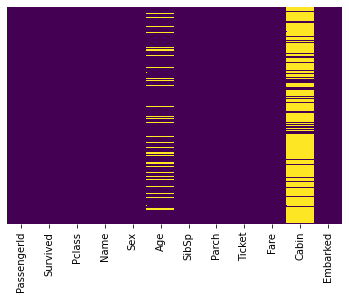

In [5]:
# In order to visualize missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style='whitegrid'

<AxesSubplot:xlabel='Survived', ylabel='count'>

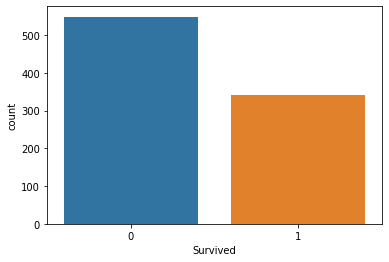

In [7]:
# Visualize the number of survivors
sns.countplot(x='Survived', data=train)

# More deceased than survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

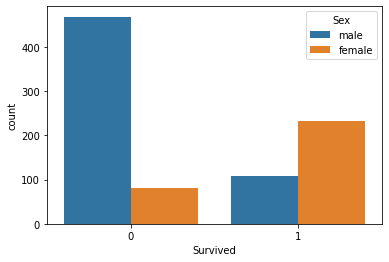

In [8]:
# Visualize the number of survivors (with sex)
sns.countplot(x='Survived', hue='Sex', data=train)

# More males died than females, more females survived than males

<AxesSubplot:xlabel='Survived', ylabel='count'>

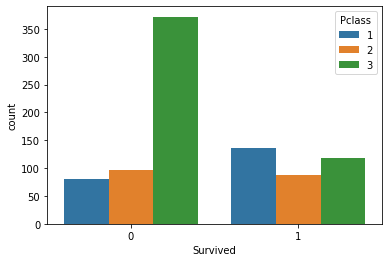

In [9]:
# Visualize the number of survivors (with class)
sns.countplot(x='Survived', hue='Pclass', data=train)

# More 3rd class Passengers died

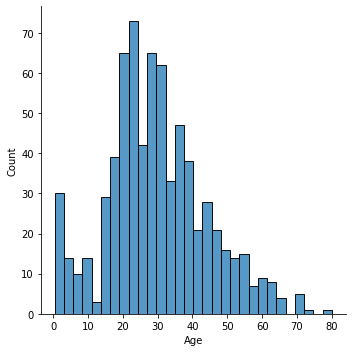

In [10]:
# Visualize the distribution of age
sns.displot(train['Age'].dropna(), kde=False, bins=30)

# Skewed towards younger passengers

<AxesSubplot:ylabel='Frequency'>

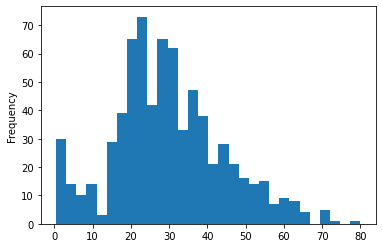

In [11]:
# Pandas Visualization
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

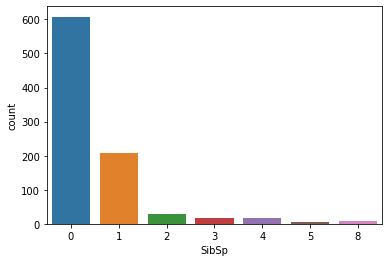

In [12]:
# Visualize number of siblings/spouses

sns.countplot(x='SibSp', data=train)

# Most passengers did not have a sibling or spouse on board

<AxesSubplot:>

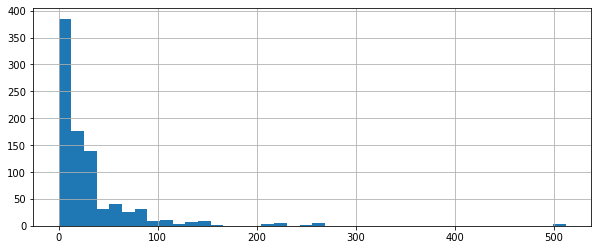

In [13]:
# Visualize the fare distribution

train['Fare'].hist(bins=40, figsize=(10, 4))

# Most fares between 0 and 100

<AxesSubplot:xlabel='Fare', ylabel='Count'>

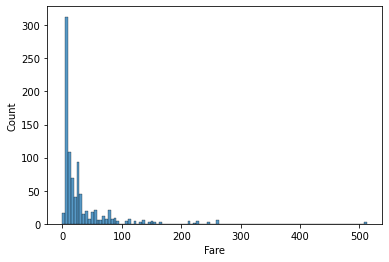

In [14]:
# Seaborn visualization
sns.histplot(x='Fare', data=train)

In [15]:
# Plotly/Cufflinks visualization
import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist', bins=30)

## Further Data Visualizations

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

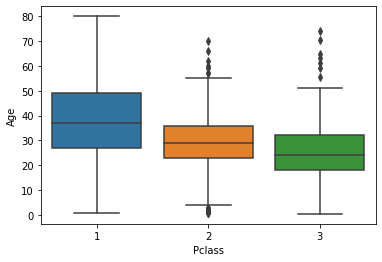

In [16]:
# Visualize wealth and age

sns.boxplot(x='Pclass', y='Age', data=train)

# 1st class passengers were generally older

## Filling in Missing Data

In [17]:
# Using average age values to impute age from passenger class

first_class_avg = train.query('Pclass==1')['Age'].mean()
second_class_avg = train.query('Pclass==2')['Age'].mean()
third_class_avg = train.query('Pclass==3')['Age'].mean()

print(first_class_avg, second_class_avg, third_class_avg)

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return first_class_avg
        elif Pclass == 2:
            return second_class_avg
        elif Pclass == 3:
            return third_class_avg
    else:
        return Age

38.233440860215055 29.87763005780347 25.14061971830986


In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

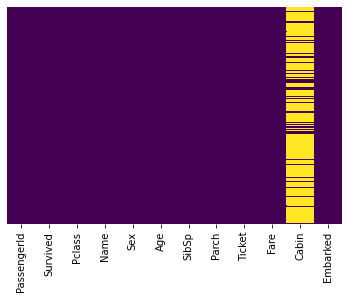

In [19]:
# Visualize filled data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
# Cabin has too many missing values
train.drop('Cabin', axis=1, inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

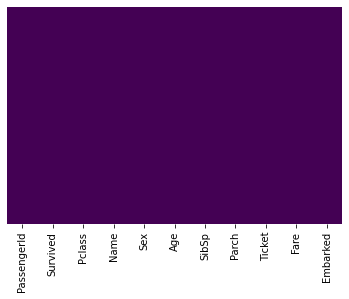

In [22]:
# Visualize Data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
# Drop any missing values
train.dropna(inplace=True)

<AxesSubplot:>

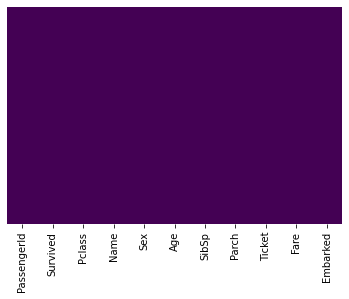

In [24]:
# Visualize Data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converting Categorical Features
Creating a dummy variable instead for these features

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
pd.get_dummies(train['Sex'])

# Still need to avoid multicollinearity 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

# Avoids columns that are perfect predictions of each other

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
# Drop categorical columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [31]:
train.head()

# All data is now numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
train.drop('PassengerId', axis=1, inplace=True)
train.head()

# PassengerId cannot be used as a predictor

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Passenger Class is a categorical column
It only has three distinct categories, so get_dummies can be run on it

## Training a Model
Predicting survival (0 or 1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing

In [47]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_scaled = preprocessing.scale(X_train)

In [58]:
logmodel = LogisticRegression(max_iter=10000)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       158
           1       0.83      0.69      0.75       109

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.80       267
weighted avg       0.82      0.82      0.81       267



In [61]:
print(confusion_matrix(y_test, predictions))

[[143  15]
 [ 34  75]]
